In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from pandas.plotting import autocorrelation_plot
from pandas import concat

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')

Year
1836     40
1837    115
1838    100
1839     80
1840     60
Name: t, dtype: int64


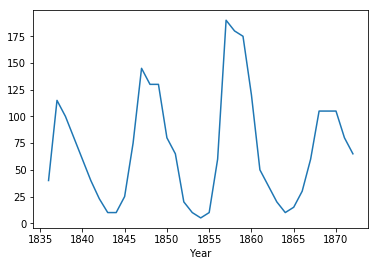

In [2]:
series = pd.read_csv("annual-sunspot-relative-number-1.csv", header=0, index_col=0, sep=";", squeeze=True)

print(series.head(5))

series.plot()
plt.show()

In [3]:
df = pd.DataFrame()
df['t'] = series.values
df['t-1'] = df.shift(1)
df['t-2'] = df['t'].shift(2)
df['t-3'] = df['t'].shift(3)

df.dropna(inplace=True)
df.head(5)

,t,t-1,t-2,t-3
3,80,100.0,115.0,40.0
4,60,80.0,100.0,115.0
5,40,60.0,80.0,100.0
6,23,40.0,60.0,80.0
7,10,23.0,40.0,60.0


In [4]:
data = np.array(df)
X, y = data[:, 1:], data[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [5]:
model = LogisticRegression(tol=0.0001, solver='newton-cg').fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_squared_error(y_test, y_pred.astype(np.int64))
mse = mean_absolute_error(y_test, y_pred.astype(np.int64))
print("Logistic Regression")
print("MAE: ", mae)
print("MSE: ", mse)

Logistic Regression
MAE:  532.8333333333334
MSE:  14.333333333333334


ARIMA
MAE: 23.707
MSE: 762.496


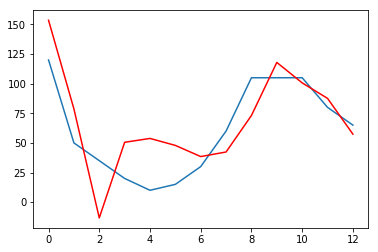

In [6]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
print("ARIMA")
print("MAE: %.3f" % mae)
print("MSE: %.3f" % mse)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()